Información del modelo:
Número de vértices: 360
Número de aristas: 360
Número de caras: 120


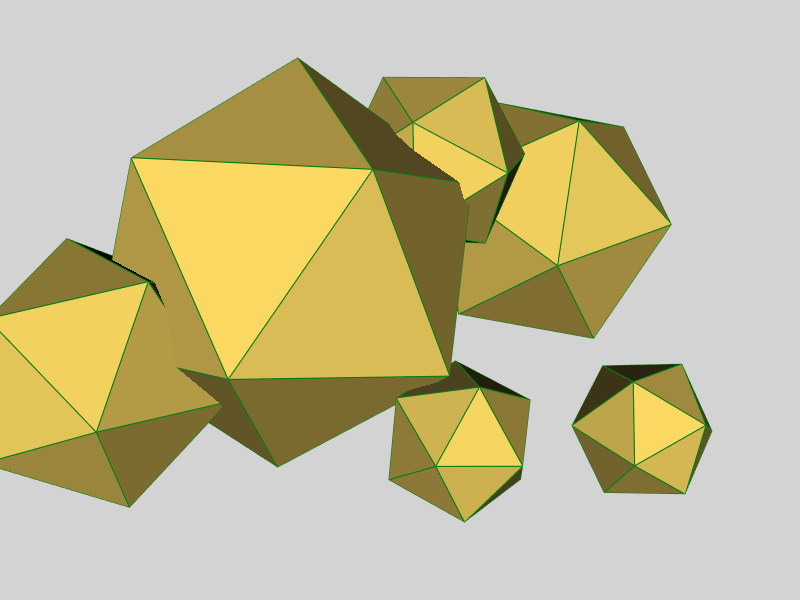

In [9]:
import trimesh
import vedo
import numpy as np
import imageio
from IPython.display import Image

# Cargar el modelo 3D
modelo = trimesh.load('three.obj')

# Extraer la malla del modelo
if isinstance(modelo, trimesh.Scene):
    if len(modelo.geometry) > 0:
        nombre_malla = list(modelo.geometry.keys())[0]
        malla = modelo.geometry[nombre_malla]
    else:
        raise ValueError("No se encontraron mallas en la escena")
else:
    malla = modelo  

# Eliminar colores existentes
malla.visual.vertex_colors = None
malla.visual.face_colors = None

# Definir colores para los elementos
color_vertices = 'blue'         
color_aristas = 'green'                   
color_caras = (255, 220, 100)   

# Crear visualizador
visualizador = vedo.Plotter(shape=(1,3), axes=0)

# Mostrar vértices
puntos = vedo.Points(malla.vertices, c=color_vertices)
visualizador.show(puntos, at=0, title="Vértices")

# Mostrar aristas
lineas = vedo.Lines(
    malla.vertices[malla.edges[:,0]],
    malla.vertices[malla.edges[:,1]],
    c=color_aristas,
    lw=2
)
visualizador.show(lineas, at=1, title="Aristas")

# Mostrar caras
malla_vedo = vedo.Mesh([malla.vertices, malla.faces])
malla_vedo.c(color_caras).lc(color_aristas).lw(1)
visualizador.show(malla_vedo, at=2, title="Caras")

# Imprimir información del modelo
print("Información del modelo:")
print(f"Número de vértices: {len(malla.vertices)}")
print(f"Número de aristas: {len(malla.edges)}")
print(f"Número de caras: {len(malla.faces)}")

def crear_animacion():
    """Genera una animación de la malla rotando y la guarda como GIF"""
    visualizador_anim = vedo.Plotter(offscreen=True, bg='lightgray')
    objeto_3d = vedo.Mesh([malla.vertices, malla.faces])
    objeto_3d.c(color_caras).lc(color_aristas).lw(1)  

    fotogramas = []
    for angulo in np.linspace(0, 360, 60):  # 60 fotogramas en lugar de 72
        visualizador_anim.show(objeto_3d, azimuth=angulo)
        fotogramas.append(visualizador_anim.screenshot(asarray=True))
    
    # Guardar animación
    imageio.mimsave('rotacion.gif', fotogramas, fps=15, loop=0)
    return Image("rotacion.gif")

# Ejecutar la generación de la animación
crear_animacion() 